Validate Grimme's QRRHO treatment for vibrational enthalpy.

*Quasi*-Rigid Rotor Harmonic Oscillator (QRRHO) models attempt to improve free
energies for weakly bounded structures.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import overreact as rx
from overreact import constants

sns.set(style="white", context="notebook", palette="colorblind", font_scale=1.1)

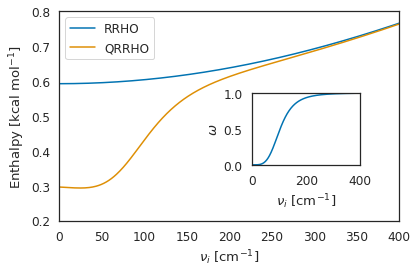

In [2]:
vibfreqs = np.linspace(0.0001, 400.0, num=400)
vibmoments = rx.thermo._gas._vibrational_moment(vibfreqs)

fig, ax = plt.subplots()
ax.plot(
    vibfreqs,
    [
        rx.thermo._gas.calc_vib_energy(vibfreq, qrrho=False) / constants.kcal
        for vibfreq in vibfreqs
    ],
    "-",
    label="RRHO",
)
ax.plot(
    vibfreqs,
    [
        rx.thermo._gas.calc_vib_energy(vibfreq, qrrho=True) / constants.kcal
        for vibfreq in vibfreqs
    ],
    "-",
    label="QRRHO",
)

inset = fig.add_axes([0.6, 0.4, 0.25, 0.25])
weights = rx.thermo._gas._head_gordon_damping(vibfreqs)
inset.plot(vibfreqs, weights)

ax.set_ylabel(r"Enthalpy [kcal mol$^{-1}$]")
ax.set_xlabel(r"$\nu_i$ [cm$^{-1}$]")
inset.set_ylabel(r"$\omega$")
inset.set_xlabel(r"$\nu_i$ [cm$^{-1}$]")

ax.set_ylim(0.2, 0.8)
ax.set_xlim(0, 400)
inset.set_ylim(0.0, 1.0)
inset.set_xlim(0, 400)

ax.legend()
fig.tight_layout()

Validate Grimme's QRRHO treatment for vibrational entropy.
The inset above consists of the damping function itself.

*Quasi*-Rigid Rotor Harmonic Oscillator (QRRHO) models attempt to improve free
energies for weakly bounded structures.

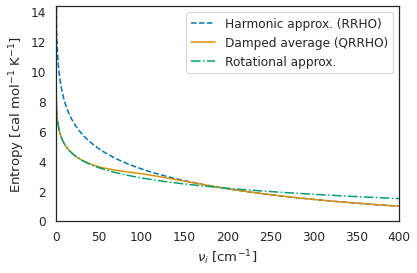

In [3]:
vibfreqs = np.linspace(0.0001, 400.0, num=400)
vibmoments = rx.thermo._gas._vibrational_moment(vibfreqs)

fig, ax = plt.subplots()
ax.plot(
    vibfreqs,
    [rx.thermo._gas.calc_vib_entropy(vibfreq, qrrho=False) / constants.calorie for vibfreq in vibfreqs],
    "--",
    label="Harmonic approx. (RRHO)",
)
ax.plot(
    vibfreqs,
    [rx.thermo._gas.calc_vib_entropy(vibfreq, qrrho=True) / constants.calorie for vibfreq in vibfreqs],
    "-",
    label="Damped average (QRRHO)",
)
ax.plot(
    vibfreqs,
    [
        rx.thermo._gas.calc_rot_entropy(moments=vibmoment, independent=True) / constants.calorie
        for vibmoment in vibmoments
    ],
    "-.",
    label="Rotational approx.",
)

ax.set_ylabel(r"Entropy [cal mol$^{-1}$ K$^{-1}$]")
ax.set_xlabel(r"$\nu_i$ [cm$^{-1}$]")

ax.set_ylim(0, 60 / constants.calorie)
ax.set_xlim(0, 400)

ax.legend()
fig.tight_layout()